In [1]:
!pip install git+https://github.com/imanring/BSTPP.git

  Cloning https://github.com/imanring/BSTPP.git to /tmp/pip-req-build-4bsvyi4m
  Running command git clone --filter=blob:none --quiet https://github.com/imanring/BSTPP.git /tmp/pip-req-build-4bsvyi4m
  Resolved https://github.com/imanring/BSTPP.git to commit b32ace1a87699ad54752e96b0ecf2bb84e272307
  Preparing metadata (setup.py) ... done
Using legacy 'setup.py install' for BSTPP, since package 'wheel' is not installed.
  Running setup.py install for BSTPP ... done


In [1]:
from bstpp.main import Point_Process_Model
import numpyro.distributions as dist
import numpy as np

# Chicago Shootings Dataset

### Cox Hawkes Model

In [2]:
import geopandas as gpd
A = gpd.read_file('data/Chicago/Boundaries - Community Areas (current).zip')

In [3]:
column_names = ['UNEMP_DENS','MEDINC','MED_HV','assoc_plus','VACANT_DEN',
       'VAC_HU_pct','HCUND20K_L','POP_DENS','CT_SP_WCHI']
model_name = 'hawkes'
model = Point_Process_Model('data/Chicago/Crime_Incident_Reports/sr_2022_xyt.csv',
                            A,model=model_name,
                            spatial_cov='data/Chicago/spat_cov_new.shp',cov_names = column_names,
                            a_0=dist.Normal(1,10), alpha = dist.Beta(20,60),beta=dist.HalfNormal(2.0)
                           )
model.args['sp_var_mu'] = 2.0

/home/imanring/PointProcess/Cox_Hawkes_Cov/bstpp/main.py:77: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  args['A_area'] = A.area.sum()/((A_[0,1]-A_[0,0])*(A_[1,1]-A_[1,0]))
/home/imanring/PointProcess/Cox_Hawkes/cox_hawkes/lib/python3.10/site-packages/geopandas/geodataframe.py:2189: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: GEOGCS["WGS84(DD)",DATUM["WGS84",SPHEROID["WGS84", ...

  return geopandas.sjoin(left_df=self, right_df=df, *args, **kwargs)  # noqa: B026
/home/imanring/PointProcess/Cox_Hawkes_Cov/bstpp/main.py:182: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this

In [5]:
model.load_rslts('output/Chicago_Shootings/hawkes/output.pkl')

In [9]:
model.log_point_wise_predictive_density('data/Chicago/Crime_Incident_Reports/sr_2023_xyt.csv')

7510.46630859375

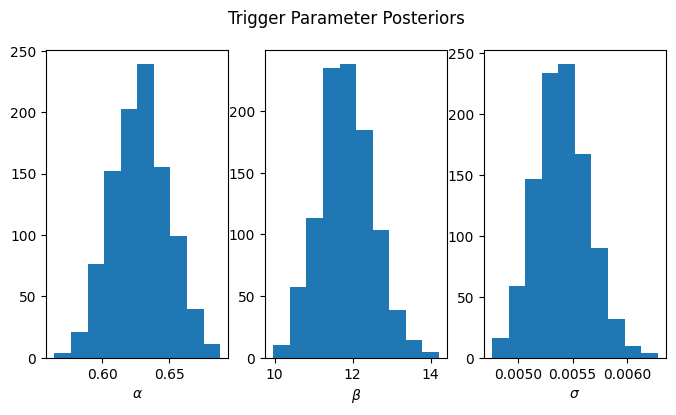

In [6]:
trig_sum = model.plot_trigger_posterior()

Mean trigger time: 111.45 days


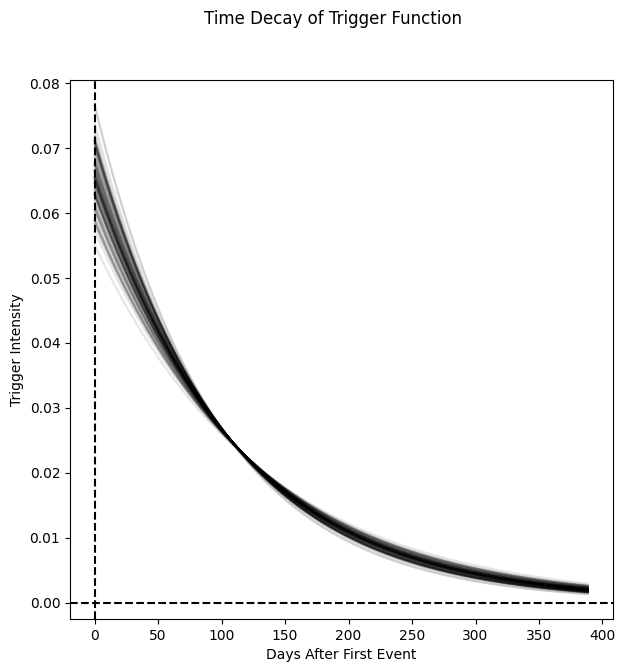

In [5]:
model.plot_trigger_time_decay()

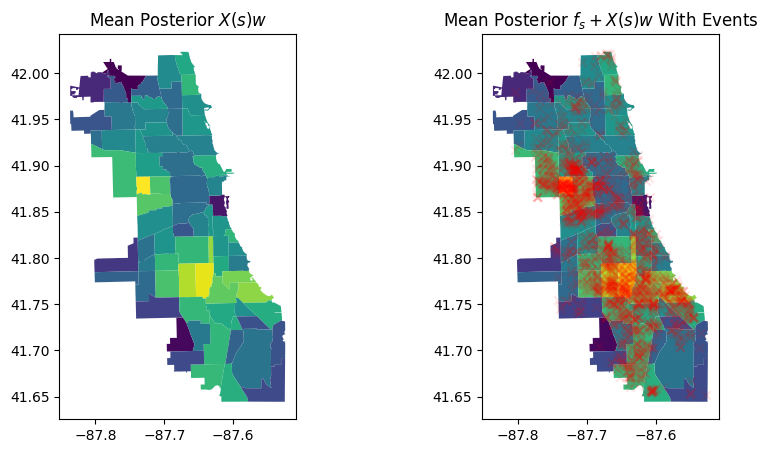

In [7]:
model.plot_spatial_background(include_cov=True)

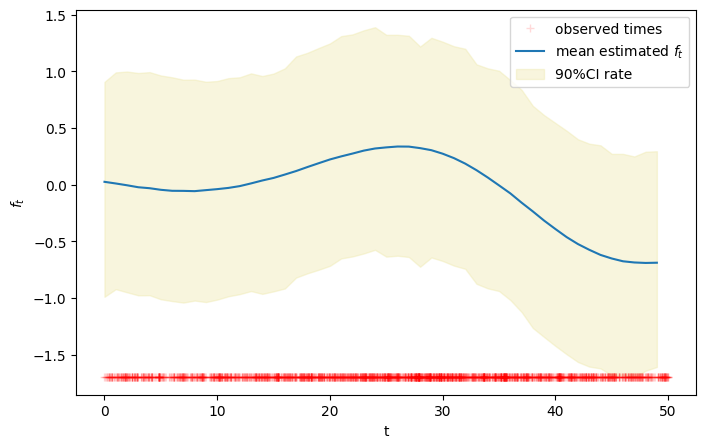

In [7]:
model.plot_temporal_background()

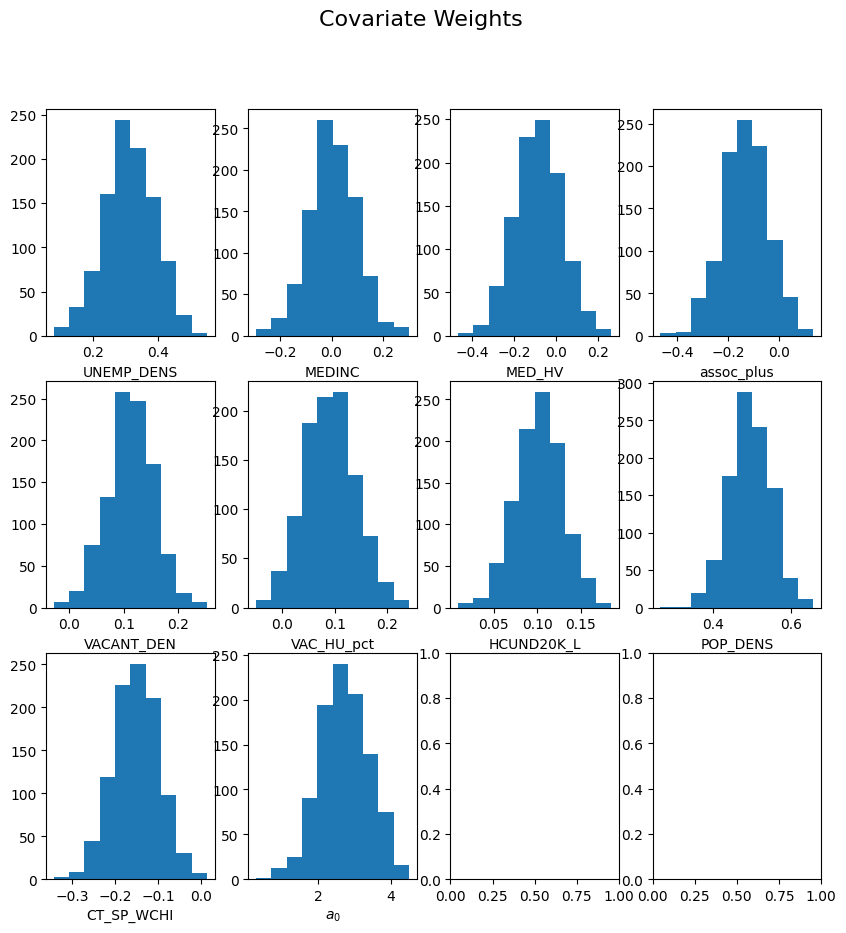

In [8]:
summary = model.cov_weight_post_summary()

In [19]:
summary

,Post Mean,Post Std,z,P>|z|,[0.025,0.975]
UNEMP_DENS,0.402876,0.066123,6.092827,1.109342e-09,0.267307,0.527230
MEDINC,-0.381747,0.083676,-4.562228,5.061354e-06,-0.543865,-0.226946
MED_HV,0.461249,0.074095,6.225127,4.811672e-10,0.319028,0.608323
assoc_plus,-0.270324,0.062071,-4.355073,1.330222e-05,-0.395542,-0.150114
VACANT_DEN,-0.097238,0.042361,-2.295435,2.170818e-02,-0.185052,-0.021933
VAC_HU_pct,0.468604,0.046929,9.985364,0.000000e+00,0.373734,0.559752
HCUND20K_L,0.071407,0.030225,2.362494,1.815241e-02,0.012446,0.131405
POP_DENS,0.392097,0.040391,9.707426,0.000000e+00,0.312347,0.467903
CT_SP_WCHI,-0.063422,0.049903,-1.270899,2.037647e-01,-0.159355,0.036514
a_0,3.750597,0.039119,95.877029,0.000000e+00,3.672989,3.823619


In [13]:
model.run_mcmc()
model.save_rslts('output/Chicago_Shootings/hawkes/output.pkl')

sample: 100%|████████████████████████████| 1500/1500 [16:47<00:00,  1.49it/s, 31 steps of size 1.43e-01. acc. prob=0.94]



                mean       std    median      5.0%     95.0%     n_eff     r_hat
       a_0      3.75      0.04      3.75      3.69      3.82    833.67      1.00
     alpha      0.63      0.02      0.63      0.59      0.66    926.40      1.00
      beta     11.85      0.68     11.83     10.71     12.96    977.70      1.00
  sigmax_2      0.00      0.00      0.00      0.00      0.00    890.38      1.00
      w[0]      0.40      0.07      0.40      0.30      0.53    657.84      1.00
      w[1]     -0.38      0.08     -0.38     -0.53     -0.26    844.64      1.00
      w[2]      0.46      0.07      0.46      0.33      0.57    804.04      1.00
      w[3]     -0.27      0.06     -0.27     -0.36     -0.16    937.98      1.00
      w[4]     -0.10      0.04     -0.10     -0.16     -0.02    827.38      1.00
      w[5]      0.47      0.05      0.47      0.40      0.55    693.41      1.00
      w[6]      0.07      0.03      0.07      0.02      0.12    771.42      1.00
      w[7]      0.39      0

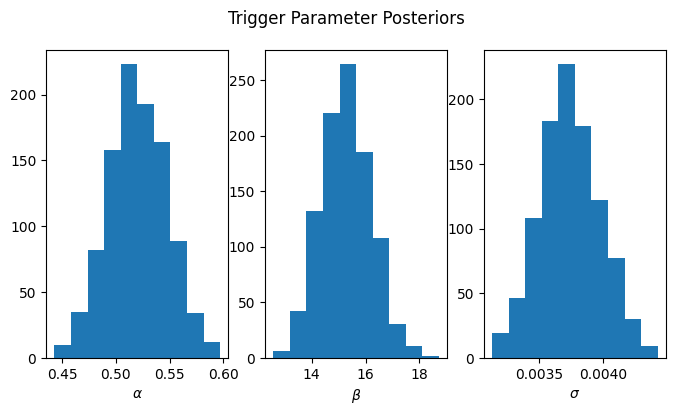

,Post Mean,Post Std,z,P>|z|,[0.025,0.975]
alpha,0.520330,0.027263,19.085670,0.0,0.466363,0.573409
beta,15.285154,0.919334,16.626339,0.0,13.571016,17.119894
sigma,0.003743,0.000233,16.046972,0.0,0.003288,0.004211


In [16]:
model.plot_trigger_posterior('output/Chicago_Shootings/cox_hawkes/final/trigger_post.png')

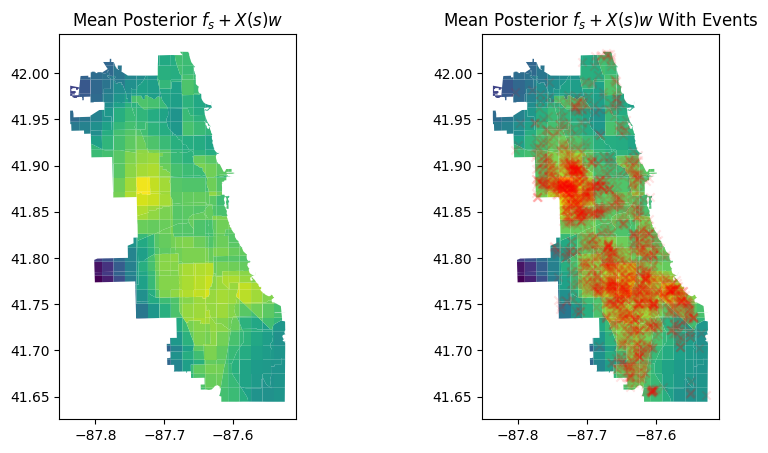

In [18]:
model.plot_spatial_background('output/Chicago_Shootings/cox_hawkes/final/sp_back_post.png',include_cov=True)

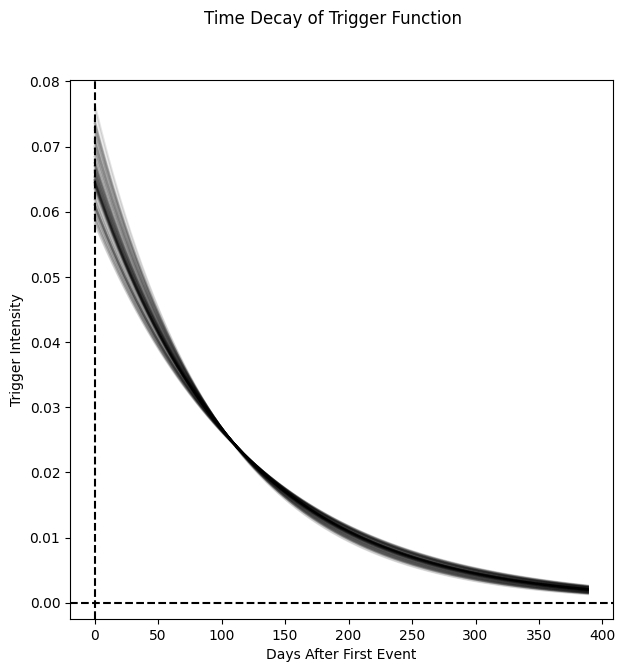

Mean trigger time: 111.45 days


In [19]:
model.plot_trigger_time_decay('output/Chicago_Shootings/cox_hawkes/final/trig_decay.png')

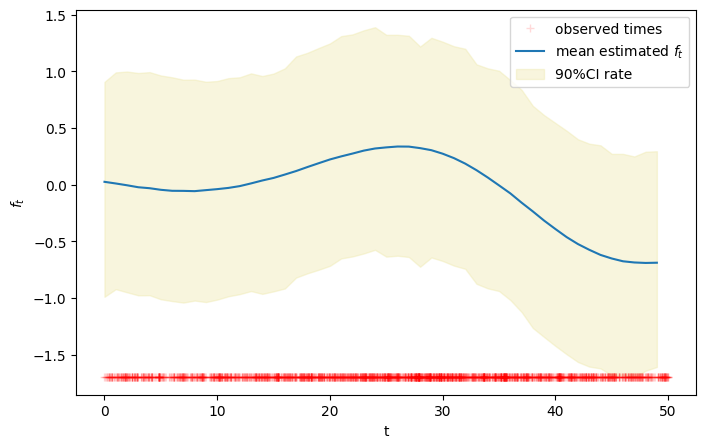

In [20]:
model.plot_temporal_background('output/Chicago_Shootings/cox_hawkes/final/t_back_post.png')

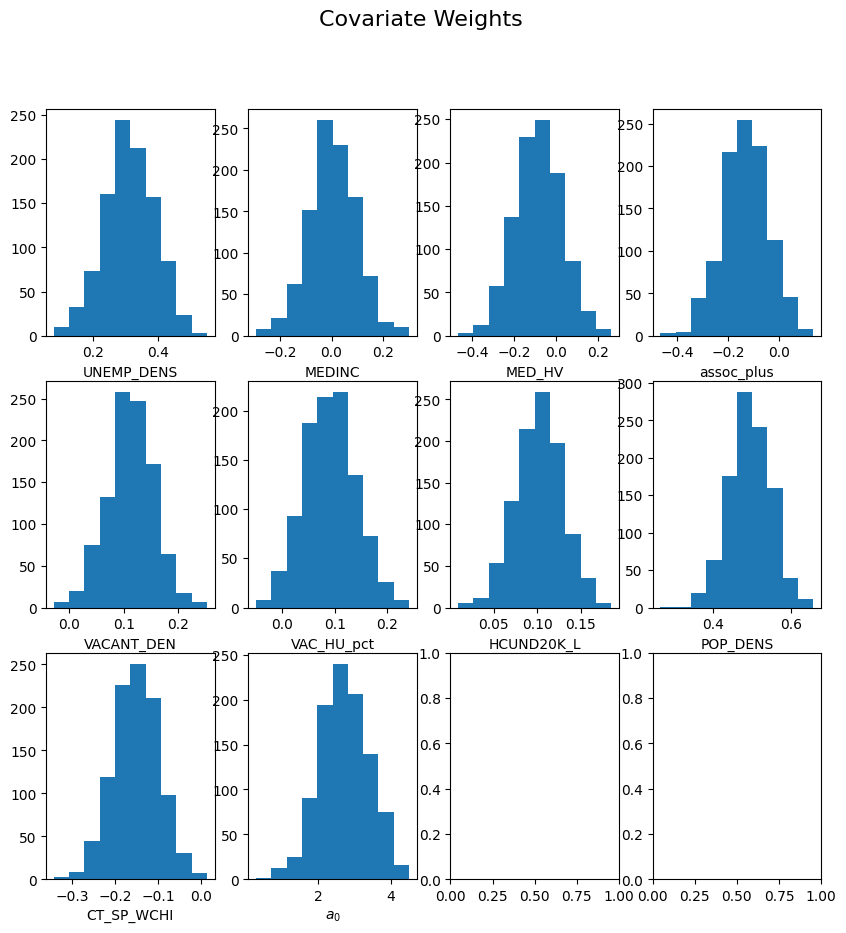

,Post Mean,Post Std,z,P>|z|,[0.025,0.975]
UNEMP_DENS,0.312386,0.077121,4.050601,0.000051,0.158358,0.456934
MEDINC,0.004424,0.093216,0.047456,0.962150,-0.191997,0.188561
MED_HV,-0.084747,0.112503,-0.753291,0.451275,-0.303382,0.135146
assoc_plus,-0.132593,0.090843,-1.459587,0.144404,-0.324232,0.041006
VACANT_DEN,0.113201,0.043158,2.622962,0.008717,0.026483,0.196128
VAC_HU_pct,0.090907,0.049570,1.833926,0.066665,-0.003047,0.190859
HCUND20K_L,0.102504,0.027050,3.789374,0.000151,0.049604,0.154991
POP_DENS,0.494260,0.054414,9.083347,0.000000,0.385863,0.595219
CT_SP_WCHI,-0.150656,0.053644,-2.808450,0.004978,-0.253478,-0.048819
a_0,2.715797,0.682109,3.981468,0.000068,1.324400,4.006296


In [21]:
model.cov_weight_post_summary(plot_file='output/Chicago_Shootings/cox_hawkes/final/cov_weights.png')

### Log Gaussian Cox Model

In [78]:
model_name = 'lgcp'
lgcp_mod = Point_Process_Model('data/Chicago/Crime_Incident_Reports/sr_2022_xyt.csv',A,model=model_name,
                            spatial_cov='data/Chicago/spat_cov_new.shp',cov_names = column_names,
                            a_0=dist.Normal(1,10)
                           )

/home/imanring/PointProcess/Cox_Hawkes_Cov/bstpp/main.py:79: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  args['A_area'] = A.area.sum()/((A_[0,1]-A_[0,0])*(A_[1,1]-A_[1,0]))
/home/imanring/PointProcess/Cox_Hawkes/cox_hawkes/lib/python3.10/site-packages/geopandas/geodataframe.py:2189: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: GEOGCS["WGS84(DD)",DATUM["WGS84",SPHEROID["WGS84", ...

  return geopandas.sjoin(left_df=self, right_df=df, *args, **kwargs)  # noqa: B026
/home/imanring/PointProcess/Cox_Hawkes_Cov/bstpp/main.py:198: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this

In [79]:
lgcp_mod.run_mcmc()

sample: 100%|███████████████████████████| 1500/1500 [00:23<00:00, 63.13it/s, 255 steps of size 1.87e-02. acc. prob=0.93]



                    mean       std    median      5.0%     95.0%     n_eff     r_hat
           a_0      4.33      0.58      4.36      3.34      5.18    439.58      1.00
          w[0]      0.40      0.05      0.40      0.32      0.50    888.83      1.00
          w[1]     -0.19      0.08     -0.19     -0.31     -0.06    931.58      1.00
          w[2]      0.06      0.09      0.06     -0.07      0.21   1313.41      1.00
          w[3]     -0.15      0.07     -0.16     -0.26     -0.03   1481.12      1.00
          w[4]      0.20      0.03      0.20      0.14      0.25    741.28      1.00
          w[5]      0.02      0.04      0.02     -0.05      0.08    745.96      1.00
          w[6]      0.18      0.02      0.18      0.15      0.21   1457.48      1.00
          w[7]      0.53      0.04      0.53      0.46      0.60    868.60      1.01
          w[8]     -0.33      0.04     -0.33     -0.39     -0.27   1348.51      1.00
  z_spatial[0]      0.46      0.09      0.46      0.31      0.60

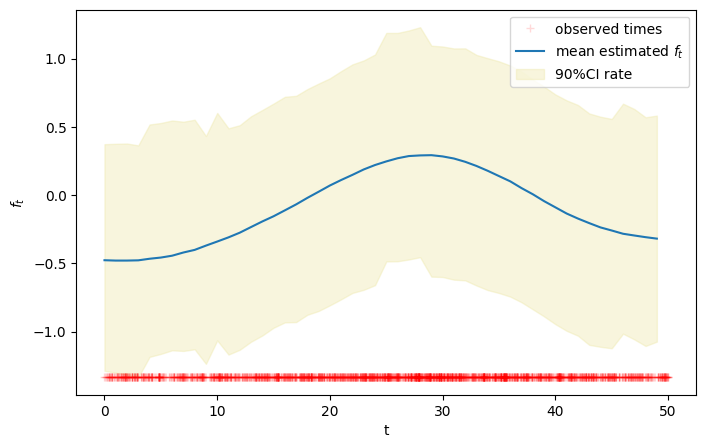

In [81]:
lgcp_mod.plot_temporal_background()

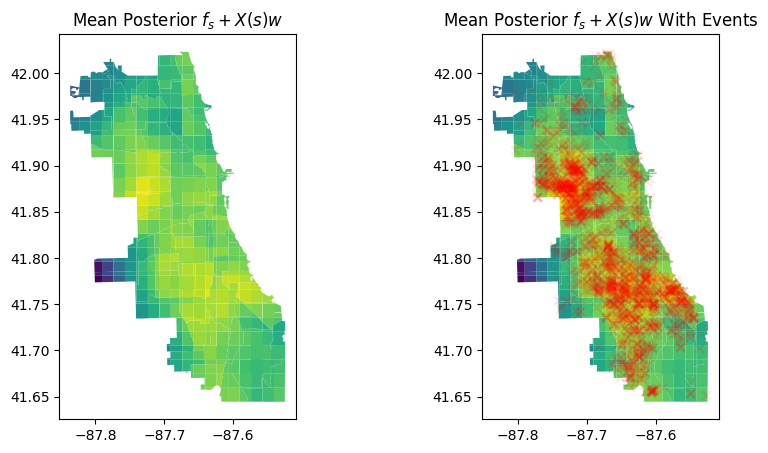

In [83]:
lgcp_mod.plot_spatial_background(include_cov=True)

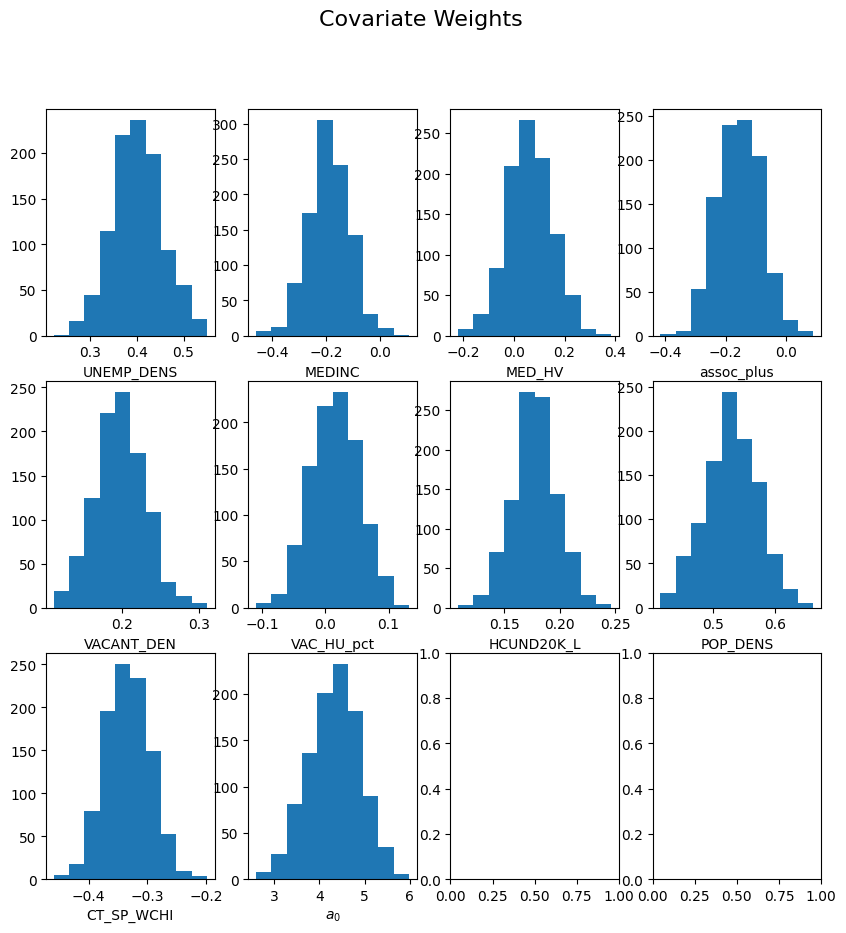

,Post Mean,Post Std,z,P>|z|,[0.025,0.975]
UNEMP_DENS,0.402816,0.053535,7.524327,5.295764e-14,0.300224,0.511867
MEDINC,-0.186779,0.077842,-2.399451,1.641967e-02,-0.332487,-0.029295
MED_HV,0.062917,0.088442,0.711395,4.768396e-01,-0.112345,0.240712
assoc_plus,-0.153660,0.072621,-2.115905,3.435290e-02,-0.290522,-0.016327
VACANT_DEN,0.197614,0.032662,6.050192,1.446731e-09,0.136254,0.262801
VAC_HU_pct,0.015195,0.038420,0.395504,6.924708e-01,-0.058944,0.088454
HCUND20K_L,0.177932,0.020102,8.851353,0.000000e+00,0.138404,0.217697
POP_DENS,0.530590,0.042850,12.382440,0.000000e+00,0.445130,0.614499
CT_SP_WCHI,-0.333584,0.038185,-8.735939,0.000000e+00,-0.406502,-0.258264
a_0,4.334584,0.574736,7.541870,4.629630e-14,3.155045,5.431880


In [84]:
lgcp_mod.cov_weight_post_summary()

# Boko Haram Dataset

### Cox Hawkes Model

In [92]:
A = np.array([[3,15.5],[4,16.5]])
column_names = ['droughtstart_speibase', 'urban_ih_log', 'droughtyr_speigdm',
       'herb_gc', 'capdist', 'grass_ih_log', 'nlights_sd_log', 'water_gc_log',
       'pop_gpw_sd_log', 'pasture_ih']
model_name = 'cox_hawkes'
bh_model = Point_Process_Model('data/spt_data.csv',A,model=model_name,
                            spatial_cov='data/inc_spatial_cov.csv',cov_grid_size=(0.5,0.5),
                            cov_names = column_names,
                            a_0=dist.Normal(1,10)
                           )

/home/imanring/PointProcess/Cox_Hawkes_Cov/bstpp/main.py:197: UserWarning: `keep_geom_type=True` in overlay resulted in 4466 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  intersect = gpd.overlay(comp_grid, spatial_cov, how='intersection')


In [93]:
bh_model.run_mcmc()

sample: 100%|█████████████████████████| 1500/1500 [2:57:09<00:00,  7.09s/it, 127 steps of size 2.69e-02. acc. prob=0.94]



                    mean       std    median      5.0%     95.0%     n_eff     r_hat
           a_0     -3.01      0.84     -2.97     -4.53     -1.69    336.90      1.00
         alpha      0.83      0.01      0.83      0.81      0.86   1100.03      1.00
          beta      0.71      0.03      0.71      0.66      0.75   1658.73      1.00
      sigmax_2      0.00      0.00      0.00      0.00      0.00    963.11      1.00
          w[0]     -0.05      0.18     -0.05     -0.34      0.24    590.97      1.00
          w[1]      0.18      0.09      0.18      0.04      0.33    618.07      1.00
          w[2]      0.02      0.07      0.02     -0.08      0.14    602.66      1.00
          w[3]      0.11      0.12      0.11     -0.11      0.28    754.38      1.00
          w[4]      0.58      0.12      0.58      0.40      0.80    579.70      1.00
          w[5]      0.17      0.08      0.17      0.04      0.31    618.79      1.00
          w[6]      0.49      0.10      0.49      0.34      0.65

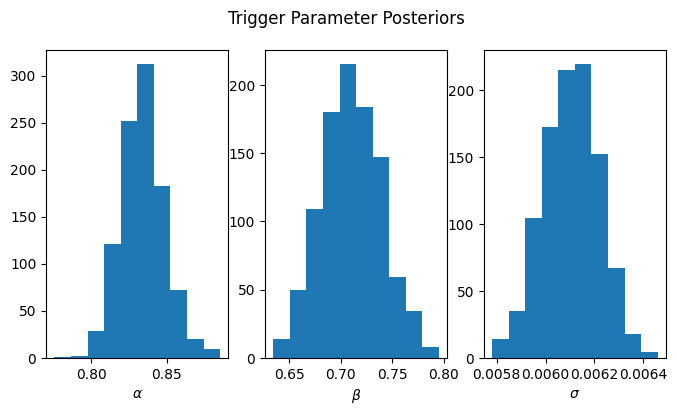

,Post Mean,Post Std,z,P>|z|,[0.025,0.975]
alpha,0.833968,0.014505,57.493313,0.0,0.807325,0.864042
beta,0.710439,0.028929,24.557823,0.0,0.656732,0.768521
sigma,0.006104,0.000113,53.913776,0.0,0.005885,0.006318


In [94]:
bh_model.plot_trigger_posterior()

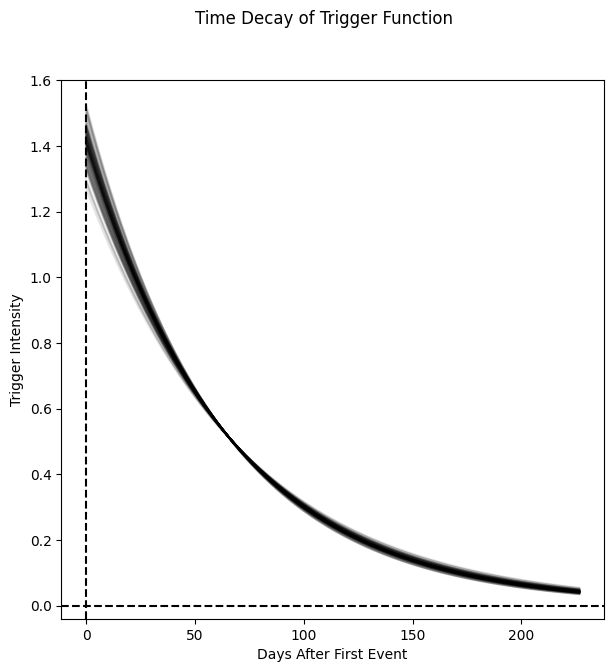

Mean trigger time: 64.99 days


In [95]:
bh_model.plot_trigger_time_decay()

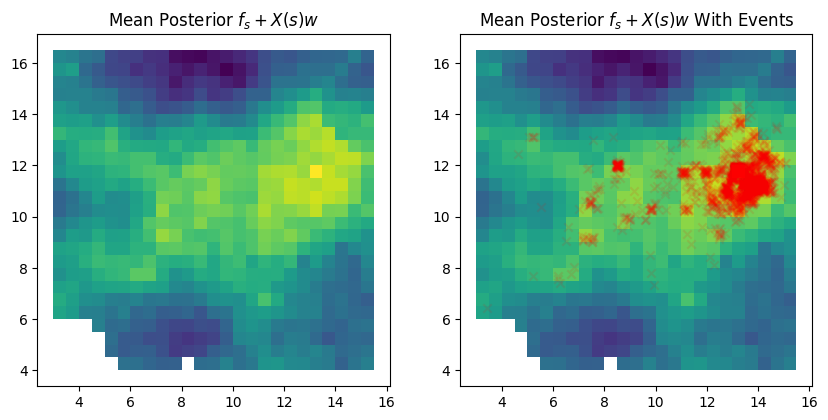

In [96]:
bh_model.plot_spatial_background(include_cov=True)

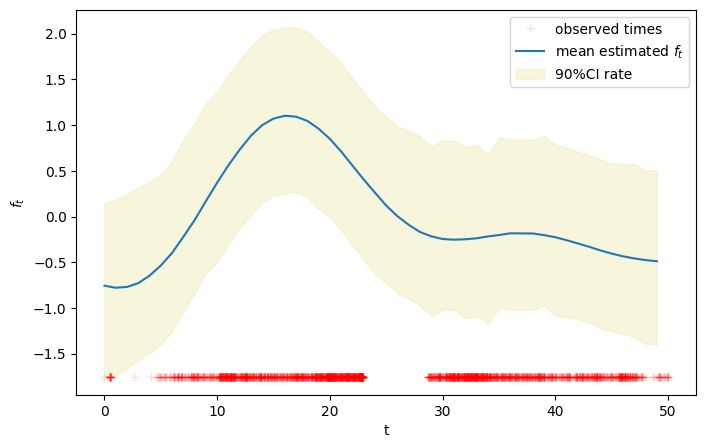

In [97]:
bh_model.plot_temporal_background()

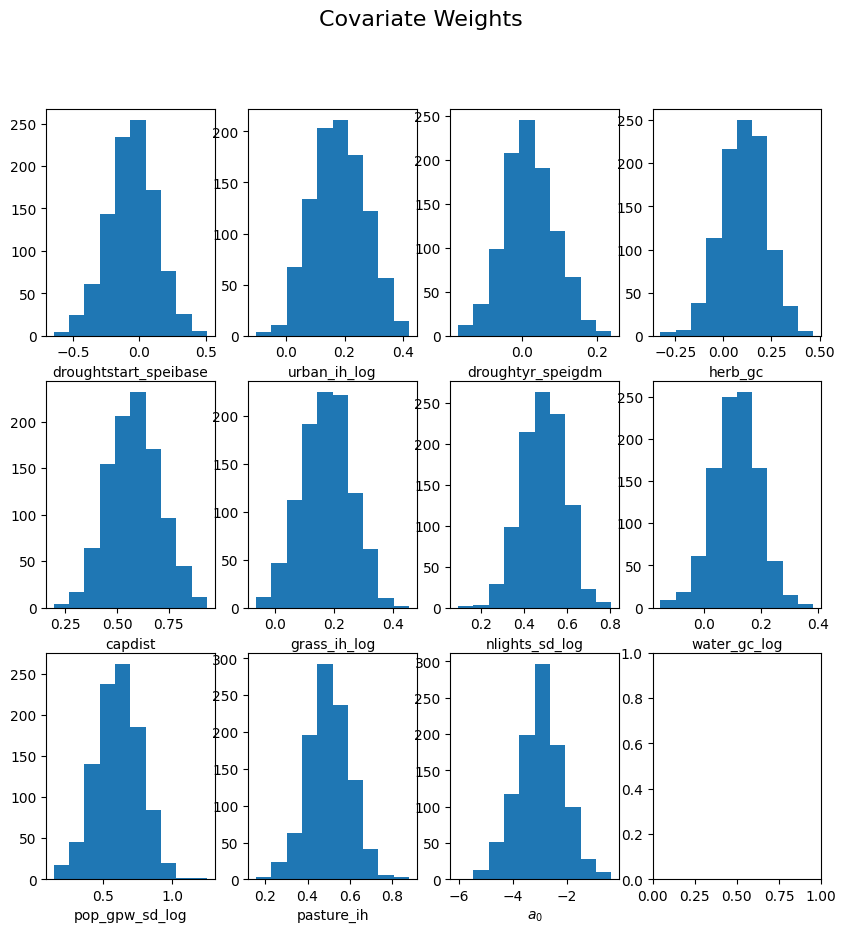

,Post Mean,Post Std,z,P>|z|,[0.025,0.975]
droughtstart_speibase,-0.054920,0.177637,-0.309170,7.571925e-01,-0.418784,0.294173
urban_ih_log,0.179665,0.090218,1.991451,4.643134e-02,0.010321,0.352972
droughtyr_speigdm,0.019080,0.067777,0.281515,7.783151e-01,-0.110222,0.152543
herb_gc,0.106550,0.117215,0.909014,3.633428e-01,-0.120045,0.328390
capdist,0.581714,0.124752,4.662957,3.116983e-06,0.345960,0.839306
grass_ih_log,0.172710,0.084025,2.055448,3.983572e-02,0.004611,0.331245
nlights_sd_log,0.489650,0.099246,4.933674,8.069694e-07,0.298793,0.670652
water_gc_log,0.111570,0.079101,1.410474,1.583998e-01,-0.048994,0.259393
pop_gpw_sd_log,0.610390,0.160454,3.804148,1.422931e-04,0.300834,0.911875
pasture_ih,0.501375,0.100177,5.004900,5.589119e-07,0.298439,0.712005


In [98]:
bh_model.cov_weight_post_summary()

### Log Gaussian Cox Process Model

In [86]:
A = np.array([[3,15.5],[4,16.5]])
column_names = ['droughtstart_speibase', 'urban_ih_log', 'droughtyr_speigdm',
       'herb_gc', 'capdist', 'grass_ih_log', 'nlights_sd_log', 'water_gc_log',
       'pop_gpw_sd_log', 'pasture_ih']
model_name = 'lgcp'
lgcp_bh_model = Point_Process_Model('data/spt_data.csv',A,model=model_name,
                            spatial_cov='data/inc_spatial_cov.csv',cov_grid_size=(0.5,0.5),
                            cov_names = column_names,
                            a_0=dist.Normal(1,10)
                           )

/home/imanring/PointProcess/Cox_Hawkes_Cov/bstpp/main.py:197: UserWarning: `keep_geom_type=True` in overlay resulted in 4466 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  intersect = gpd.overlay(comp_grid, spatial_cov, how='intersection')


In [87]:
lgcp_bh_model.run_mcmc()

sample: 100%|███████████████████████████| 1500/1500 [00:35<00:00, 42.27it/s, 767 steps of size 1.20e-02. acc. prob=0.94]



                    mean       std    median      5.0%     95.0%     n_eff     r_hat
           a_0     -5.71      0.69     -5.73     -6.76     -4.56    499.68      1.01
          w[0]     -0.33      0.12     -0.33     -0.53     -0.14    750.96      1.00
          w[1]     -0.11      0.05     -0.11     -0.19     -0.03    692.85      1.00
          w[2]     -0.04      0.03     -0.04     -0.08      0.02    799.20      1.00
          w[3]      0.13      0.08      0.13      0.00      0.25    876.48      1.00
          w[4]      0.61      0.08      0.60      0.47      0.72    922.60      1.00
          w[5]      0.23      0.04      0.23      0.16      0.29   1126.84      1.00
          w[6]      0.79      0.04      0.79      0.72      0.86    911.15      1.00
          w[7]     -0.06      0.04     -0.06     -0.13      0.01    930.52      1.00
          w[8]      1.00      0.08      1.01      0.87      1.13    716.58      1.00
          w[9]      0.83      0.05      0.83      0.74      0.91

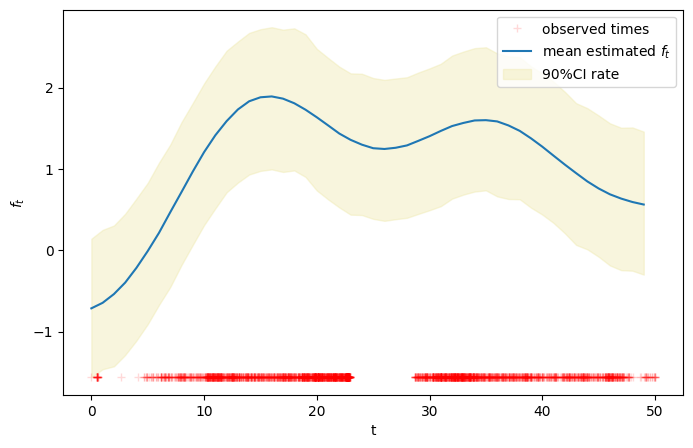

In [89]:
lgcp_bh_model.plot_temporal_background()

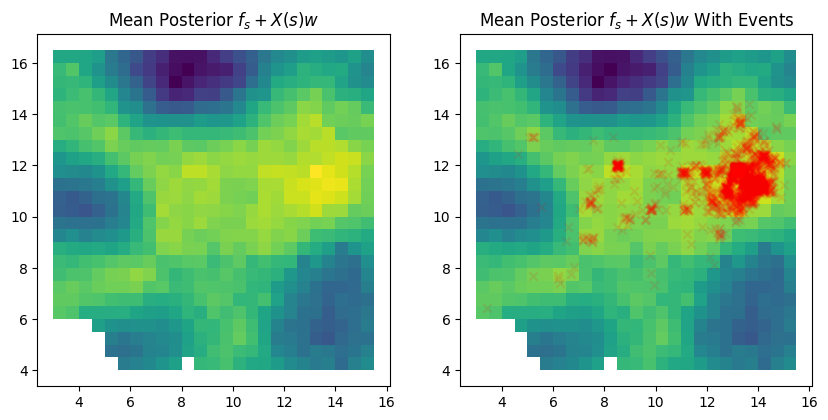

In [91]:
lgcp_bh_model.plot_spatial_background(include_cov=True)

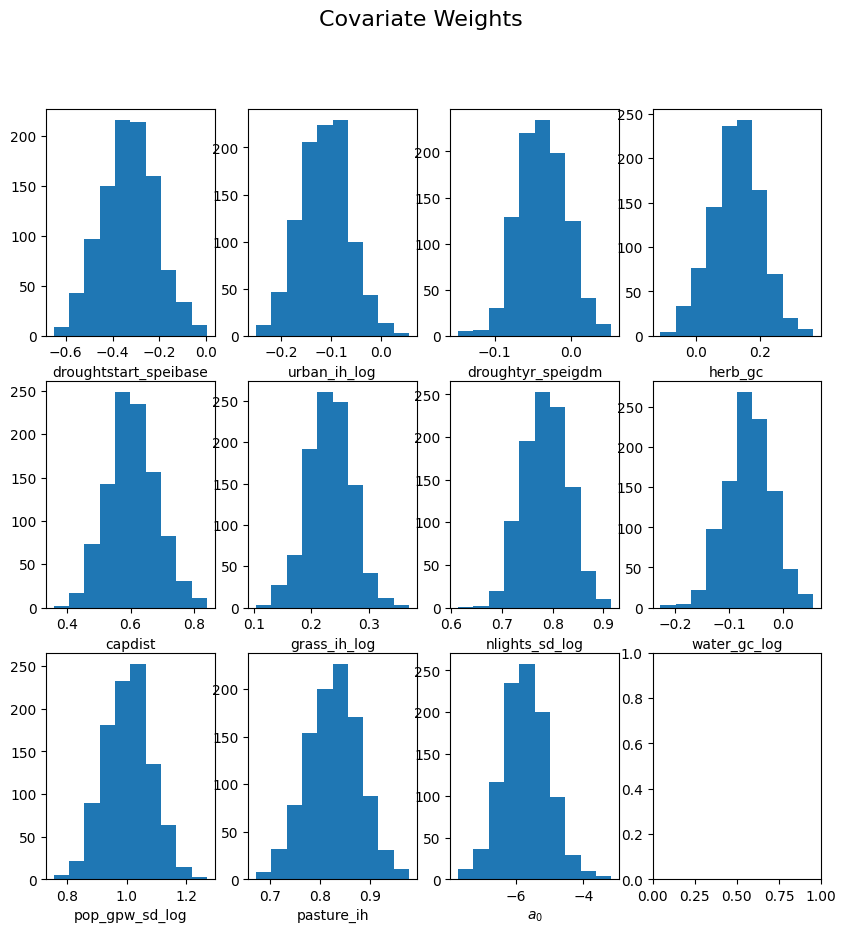

,Post Mean,Post Std,z,P>|z|,[0.025,0.975]
droughtstart_speibase,-0.330415,0.115565,-2.859134,4.247984e-03,-0.559327,-0.110358
urban_ih_log,-0.112862,0.049089,-2.299100,2.149925e-02,-0.207496,-0.013711
droughtyr_speigdm,-0.037317,0.031506,-1.184442,2.362381e-01,-0.096529,0.025427
herb_gc,0.126809,0.075890,1.670966,9.472831e-02,-0.021664,0.271073
capdist,0.605485,0.076409,7.924263,2.331468e-15,0.464460,0.761278
grass_ih_log,0.232062,0.037814,6.137008,8.409015e-10,0.155083,0.305863
nlights_sd_log,0.786449,0.043380,18.129097,0.000000e+00,0.705875,0.872103
water_gc_log,-0.063287,0.042735,-1.480925,1.386265e-01,-0.148873,0.023159
pop_gpw_sd_log,1.003880,0.077562,12.942969,0.000000e+00,0.856958,1.161071
pasture_ih,0.827466,0.052519,15.755466,0.000000e+00,0.721488,0.932285


In [88]:
lgcp_bh_model.cov_weight_post_summary()

In [12]:
from sklearn.metrics.pairwise import haversine_distances
model.comp_grid.bounds.min(),model.comp_grid.bounds.max()
(haversine_distances([[-87.940114,41.644543]],[[-87.524137,41.644543]])[0,0]*6367*.00525,
haversine_distances([[-87.940114,41.644543]],[[-87.940114,42.023039]])[0,0]*6367*.00525)

(13.904759184749935, 12.648054419264795)